# TP : EDA + Prétraitement

Nom et prénom : BEYER-BONNIARD Lucas

Nous allons exploiter un jeu de données au format CSV afin de mettre en pratique les concepts abordés durant le cours.

1 - Analyse exploratoire des données :

* Calculer les statistiques de base, telles que la moyenne, la médiane, la variance, le maximum et le minimum.
* Examiner les distributions et identifier les valeurs aberrantes.
* Analyse univariée / bivariée / multivariée
* Calculer les corrélations entre les variables.

2 - Prétraitement de données:
* Traiter les valeurs manquantes.
* Traiter les valeurs aberrantes.
* Encoder les variables qualitatives.
* Créer des nouvelles variables

Ceci est un simple rappel de quelques étapes. Vous êtes libre d'effectuer l'analyse et la préparation des données dans l'ordre et avec les méthodes de votre choix.

Dans ce TP, votre note sera attribuée en fonction des éléments suivants :
- Clarté et Structure du Rapport 20%
- Approche et Méthodes 30%
- Résultats et Interprétation 30%
- Code et Exécution 20%

## L'objectif du projet

Le marché des voitures d'occasion en Inde connaît une forte demande, surpassant désormais celui des voitures neuves. Cars4U, une start-up technologique, cherche à exploiter cette tendance. Étant donné l'incertitude élevée dans la tarification et l'approvisionnement des voitures d'occasion, il est crucial de développer un modèle de tarification efficace.

L'objectif de ce TP est de réaliser une analyse exploratoire des données afin de comprendre les facteurs influençant le prix des voitures d'occasion et d'obtenir des résultats sur ces éléments. Un autre objectif est de préparer le dataset pour la modélisation, par exemple en vue d'une régression linéaire, pour prédire de manière plus précise le prix des véhicules.

## Le jeu de données

Télécharger le fichier used_cars_data.csv qui sera notre jeu de données pour ce TP. https://www.kaggle.com/datasets/sukhmanibedi/cars4u

Les attributs sont définis comme suit :

* S.No. : Numéro de série
* Name : Nom de la voiture, incluant la marque et le modèle
* Location : ville où la voiture est vendue ou disponible à l'achat
* Year : Année de fabrication de la voiture
* Kilometers_driven : Le nombre total de kilomètres parcourus par le précédent propriétaire ou les précédents propriétaires, en kilomètres (KM)
* Fuel_Type : Le type de carburant utilisé par la voiture (Essence, Diesel, Électrique, CNG, LPG)
* Transmission : Le type de transmission de la voiture (Automatique / Manuelle)
* Owner : Type de propriétaire
* Mileage : La consommation standard de la voiture, exprimée en km/litre ou km/kg
* Engine : La cylindrée du moteur en CC
* Power : La puissance maximale du moteur en chevaux-vapeur en bhp
* Seats : Le nombre de sièges dans la voiture
* New_Price : Le prix d'une voiture neuve du même modèle en INR Lakhs (1 Lakh = 100 000) et en Crore
* Price : Le prix de la voiture d'occasion en INR Lakhs (1 Lakh = 100 000)

# TP


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('used_cars_data.csv')
df.head()

HEADER = '\033[95m'
BLUE = '\033[94m'
CYAN = '\033[96m'
GREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'


## Statistiques de base

In [3]:
print(f'{HEADER}Statistiques de base:{ENDC}')
print(f'{CYAN}{df.describe()}{ENDC}')

numerical_columns = df.select_dtypes(include=[np.number]).columns

print(f'\n{HEADER}Variance pour chaque variable numérique:{ENDC}')
for col in numerical_columns:
    print(f'{CYAN}{col}: {BOLD}{df[col].var():.2f}{ENDC}')

Statistiques de base:
             S.No.         Year  Kilometers_Driven        Seats        Price
count  7253.000000  7253.000000       7.253000e+03  7200.000000  6019.000000
mean   3626.000000  2013.365366       5.869906e+04     5.279722     9.479468
std    2093.905084     3.254421       8.442772e+04     0.811660    11.187917
min       0.000000  1996.000000       1.710000e+02     0.000000     0.440000
25%    1813.000000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3626.000000  2014.000000       5.341600e+04     5.000000     5.640000
75%    5439.000000  2016.000000       7.300000e+04     5.000000     9.950000
max    7252.000000  2019.000000       6.500000e+06    10.000000   160.000000

Variance pour chaque variable numérique:
S.No.: 4384438.50
Year: 10.59
Kilometers_Driven: 7128040002.78
Seats: 0.66
Price: 125.17


## Examiner les distributions et identifier les valeurs aberrantes.

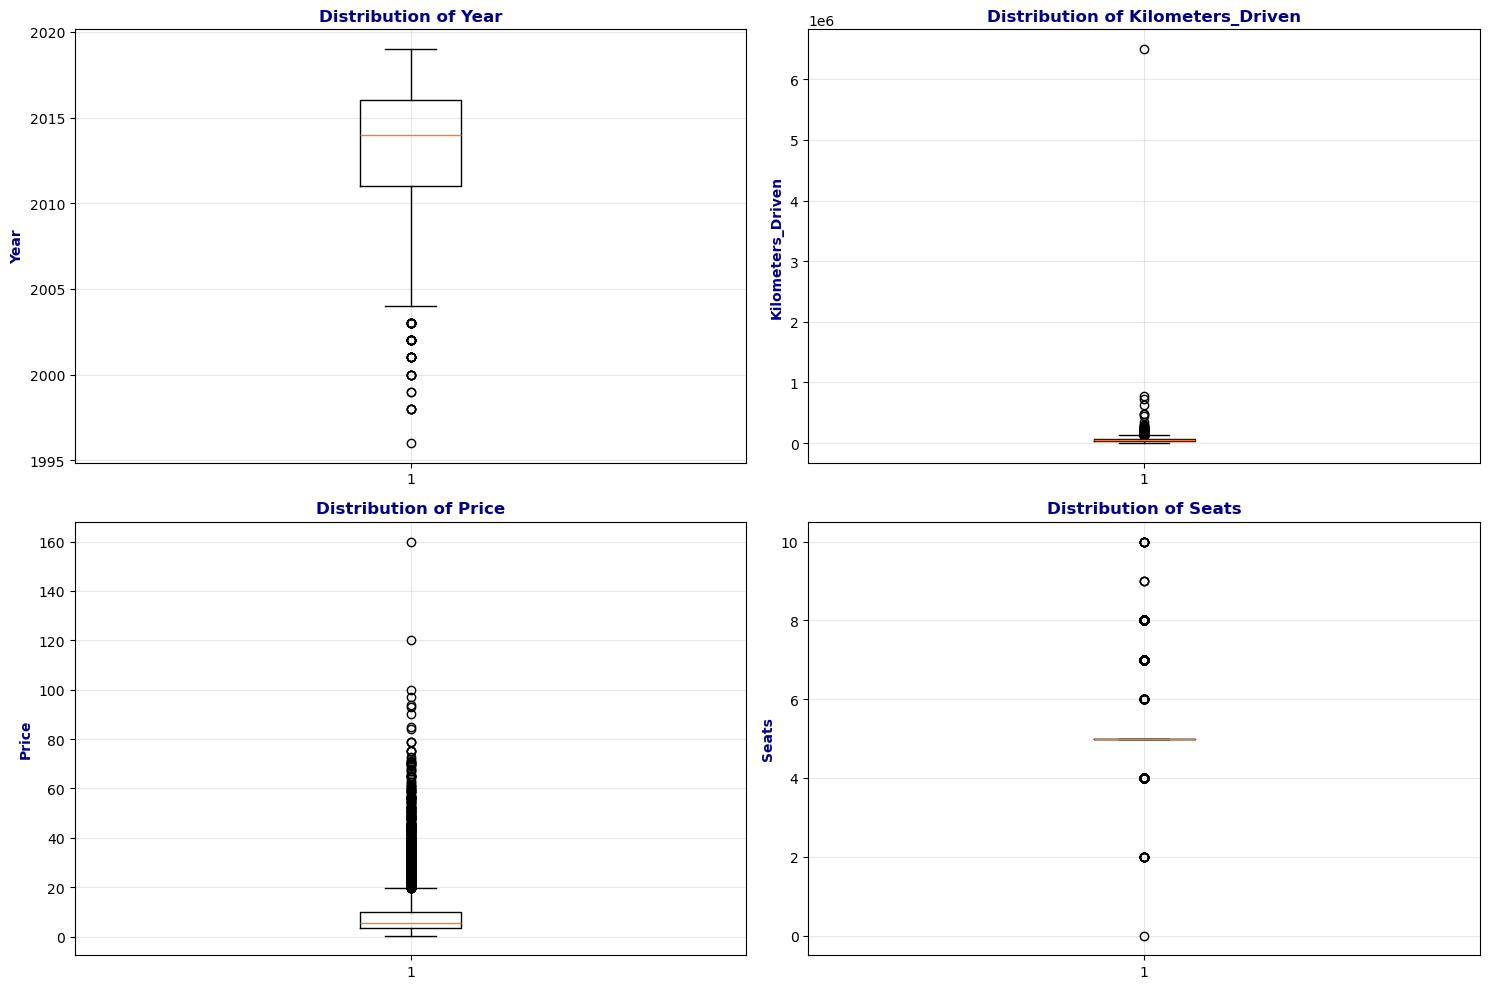

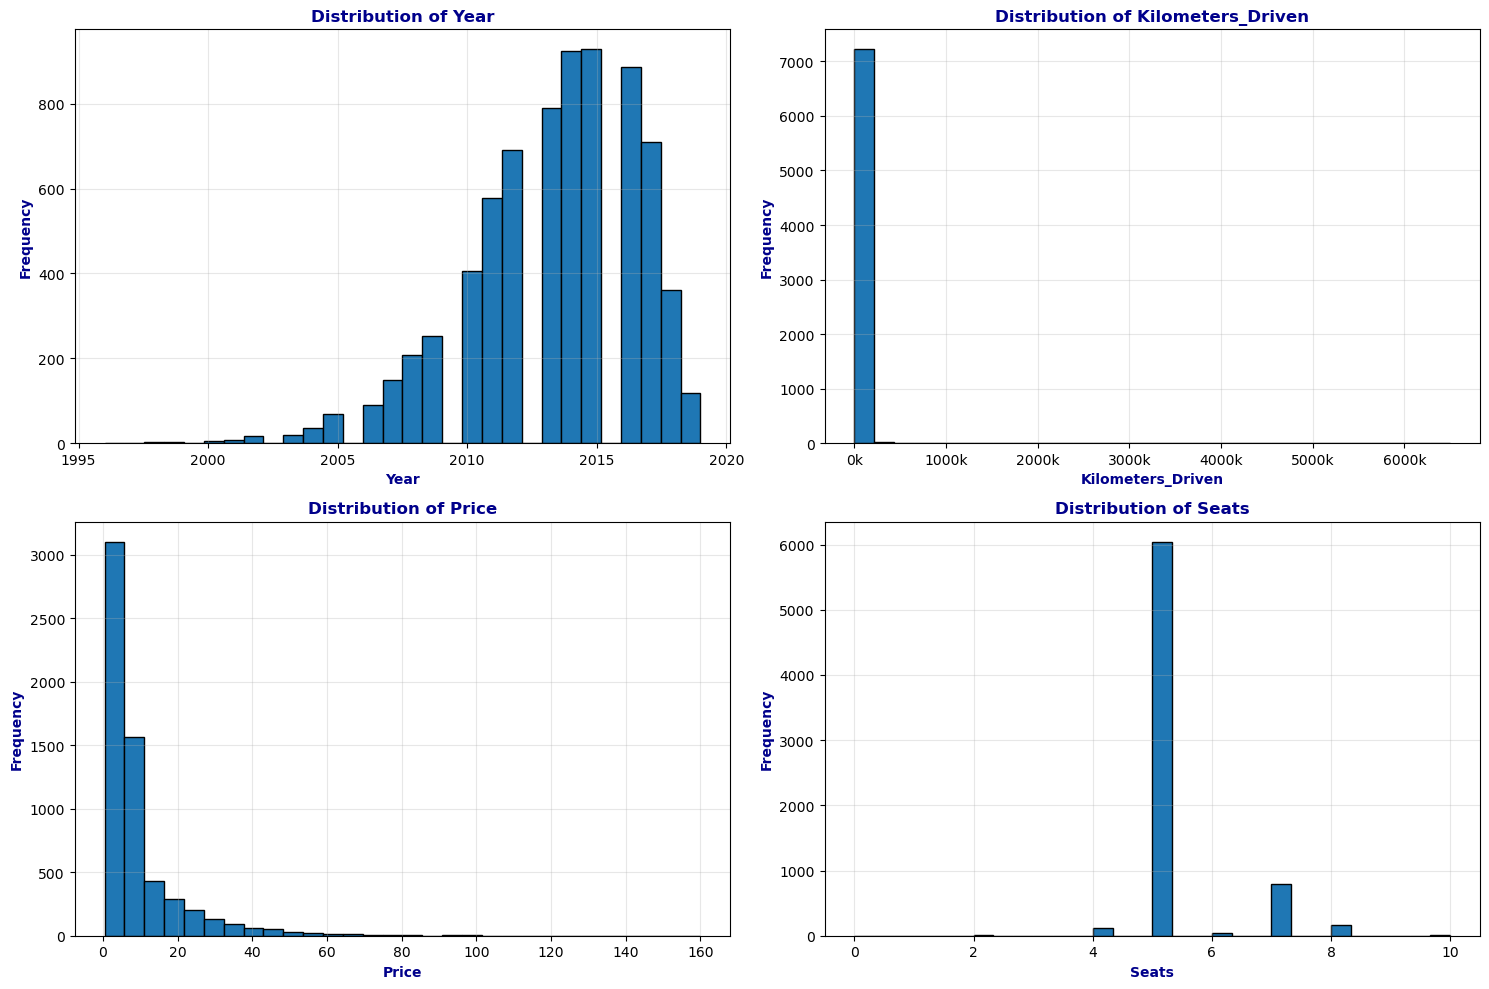

Analyse des valeurs aberrantes:

Year:
Nombre de valeurs aberrantes: 58
Limite inférieure: 2003.50
Limite supérieure: 2023.50
Valeur minimale: 1996.00
Valeur maximale: 2019.00

Kilometers_Driven:
Nombre de valeurs aberrantes: 258
Limite inférieure: -24500.00
Limite supérieure: 131500.00
Valeur minimale: 171.00
Valeur maximale: 6500000.00

Price:
Nombre de valeurs aberrantes: 718
Limite inférieure: -6.17
Limite supérieure: 19.62
Valeur minimale: 0.44
Valeur maximale: 160.00

Seats:
Nombre de valeurs aberrantes: 1153
Limite inférieure: 5.00
Limite supérieure: 5.00
Valeur minimale: 0.00
Valeur maximale: 10.00


In [43]:
numerical_features = ['Year', 'Kilometers_Driven', 'Price', 'Seats']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    data = df[feature].dropna()
    plt.boxplot(data)
    plt.title(f'Distribution of {feature}', color='darkblue', fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.ylabel(feature, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    data = df[feature].dropna()
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}', color='darkblue', fontweight='bold')
    plt.grid(True, alpha=0.3)
    if feature == 'Kilometers_Driven':
        plt.gca().xaxis.set_major_formatter(lambda x, p: f'{int(x/1000)}k')
    plt.xlabel(feature, color='darkblue', fontweight='bold')
    plt.ylabel('Frequency', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

print(f'{HEADER}Analyse des valeurs aberrantes:{ENDC}')
for feature in numerical_features:
    n_outliers, lower, upper = detect_outliers(df, feature)
    print(f'\n{CYAN}{feature}:{ENDC}')
    print(f'{BLUE}Nombre de valeurs aberrantes: {BOLD}{n_outliers}{ENDC}')
    print(f'{BLUE}Limite inférieure: {BOLD}{lower:.2f}{ENDC}')
    print(f'{BLUE}Limite supérieure: {BOLD}{upper:.2f}{ENDC}')
    print(f'{BLUE}Valeur minimale: {BOLD}{df[feature].min():.2f}{ENDC}')
    print(f'{BLUE}Valeur maximale: {BOLD}{df[feature].max():.2f}{ENDC}')

Ici on voit que les valeurs aberrantes sont les valeurs qui sont en dehors de la boite à moustache. Mais certaines valeurs peuvent parraitre aberrantes mais ne le sont pas, exemple:
- Le prix des voitures d'occasion est en général compris entre 1 et 10 Lakh INR. Mais il existe des voitures d'occasion qui sont vendues à des prix très élevés, jusqu'à 100 Lakh INR.
- Le nombre de kilomètres parcourus par une voiture d'occasion est en général compris entre 0 et 100 000 km. Mais il existe des voitures d'occasion qui ont parcouru des centaines de milliers de kilomètres.






## Nettoyage des données quantitatives

In [48]:
df_original = df.copy()
initial_rows = len(df)

print(f"\n{CYAN}KILOMÈTRES{ENDC}")
rows_before_km = len(df)
df_clean = df.copy()
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_km}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean['Kilometers_Driven'].isnull().sum()}{ENDC}
{BLUE}Valeurs négatives : {BOLD}{len(df_clean[df_clean['Kilometers_Driven'] < 0])}{ENDC}
{BLUE}Valeurs > 1 million : {BOLD}{len(df_clean[df_clean['Kilometers_Driven'] > 1000000])}{ENDC}""")

df_clean = df_clean[
    df_clean['Kilometers_Driven'].notnull() & 
    (df_clean['Kilometers_Driven'] >= 0) & 
    (df_clean['Kilometers_Driven'] <= 1000000)
]
rows_after_km = len(df_clean)
print(f"""{BLUE}Nombre de lignes après traitement : {BOLD}{rows_after_km}{ENDC}
{BLUE}Lignes supprimées (total) : {BOLD}{rows_before_km - rows_after_km}{ENDC}\n""")

print(f"{CYAN}PRIX{ENDC}")
rows_before_price = len(df_clean)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_price}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean['Price'].isnull().sum()}{ENDC}
{BLUE}Valeurs négatives ou nulles : {BOLD}{len(df_clean[df_clean['Price'] <= 0])}{ENDC}""")

df_clean = df_clean[
    df_clean['Price'].notnull() & 
    (df_clean['Price'] > 0)
]
rows_after_price = len(df_clean)
print(f"""{BLUE}Nombre de lignes après traitement : {BOLD}{rows_after_price}{ENDC}
{BLUE}Lignes supprimées (total) : {BOLD}{rows_before_price - rows_after_price}{ENDC}\n""")

print(f"{CYAN}SIÈGES{ENDC}")
rows_before_seats = len(df_clean)
missing_seats = df_clean['Seats'].isnull().sum()
zero_seats = len(df_clean[df_clean['Seats'] == 0])
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_seats}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{missing_seats}{ENDC}
{BLUE}Valeurs à 0 : {BOLD}{zero_seats}{ENDC}""")

df_clean = df_clean[df_clean['Seats'].notnull()]
median_seats = df_clean['Seats'].median()
zeros_to_replace = len(df_clean[df_clean['Seats'] == 0])
df_clean.loc[df_clean['Seats'] == 0, 'Seats'] = median_seats

rows_after_seats = len(df_clean)
print(f"""{BLUE}Valeur médiane pour remplacement : {BOLD}{median_seats}{ENDC}
{BLUE}Nombre de lignes après traitement : {BOLD}{rows_after_seats}{ENDC}
{BLUE}Lignes supprimées (valeurs manquantes) : {BOLD}{rows_before_seats - rows_after_seats}{ENDC}
{BLUE}Valeurs modifiées (0 remplacés par {median_seats}) : {BOLD}{zeros_to_replace}{ENDC}\n""")

total_removed = initial_rows - len(df_clean)
print(f"""{HEADER}Résumé:{ENDC}
{BLUE}Nombre total de lignes supprimées : {BOLD}{total_removed}{ENDC}
{BLUE}Nombre de lignes restantes : {BOLD}{len(df_clean)}{ENDC}""")



KILOMÈTRES
Nombre de lignes avant traitement : 7253
Valeurs manquantes : 0
Valeurs négatives : 0
Valeurs > 1 million : 1
Nombre de lignes après traitement : 7252
Lignes supprimées (total) : 1

PRIX
Nombre de lignes avant traitement : 7252
Valeurs manquantes : 1234
Valeurs négatives ou nulles : 0
Nombre de lignes après traitement : 6018
Lignes supprimées (total) : 1234

SIÈGES
Nombre de lignes avant traitement : 6018
Valeurs manquantes : 42
Valeurs à 0 : 1
Valeur médiane pour remplacement : 5.0
Nombre de lignes après traitement : 5976
Lignes supprimées (valeurs manquantes) : 42
Valeurs modifiées (0 remplacés par 5.0) : 1

Résumé:
Nombre total de lignes supprimées : 1277
Nombre de lignes restantes : 5976


J'ai choisi de supprimer les ligne Dont il manquait les données suivantes:
- Kilomètres_Driven
- Price

Car il n'est pas possible de faire de l'analyse sans ces données, très importantes.

J'ai aussi décider de garder toutes les années, car il n'y a pas de données aberrantes.

Et enfin j'ai décider de remplacer les valeurs à 0 pour le nombre de sièges par la médiane, car le nombre de sièges n'est pas une donnée si importante dans cette étude.


## Nettoyage des données qualitatives

## Analyse univariée / bivariée / multivariée


### Univariée


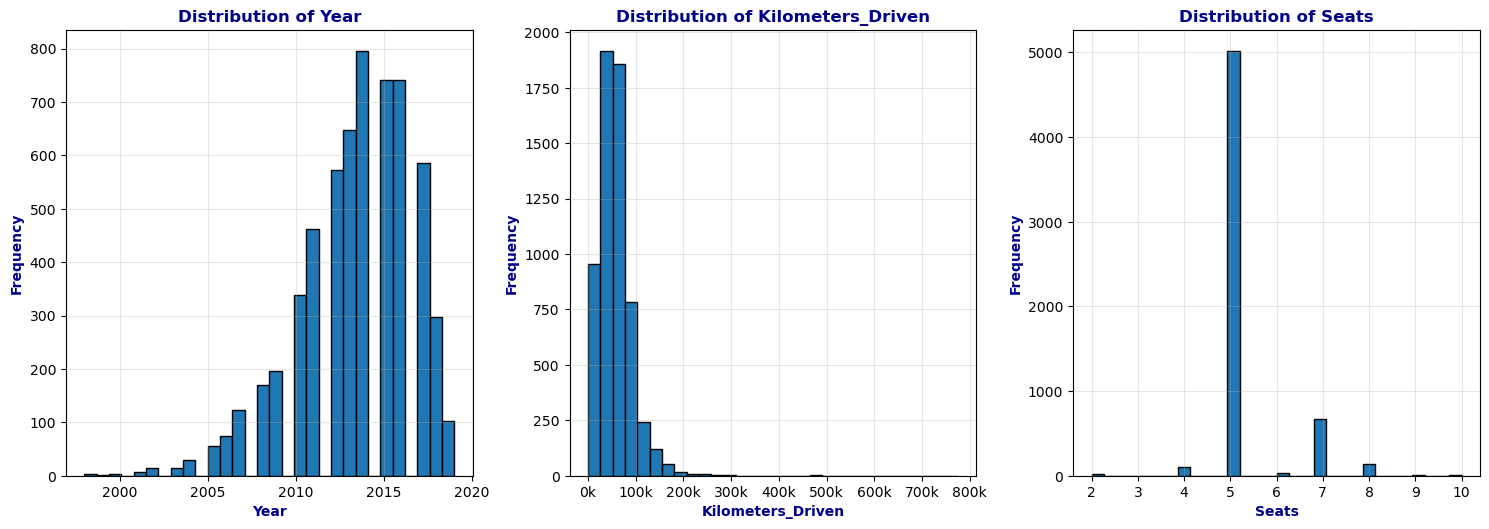

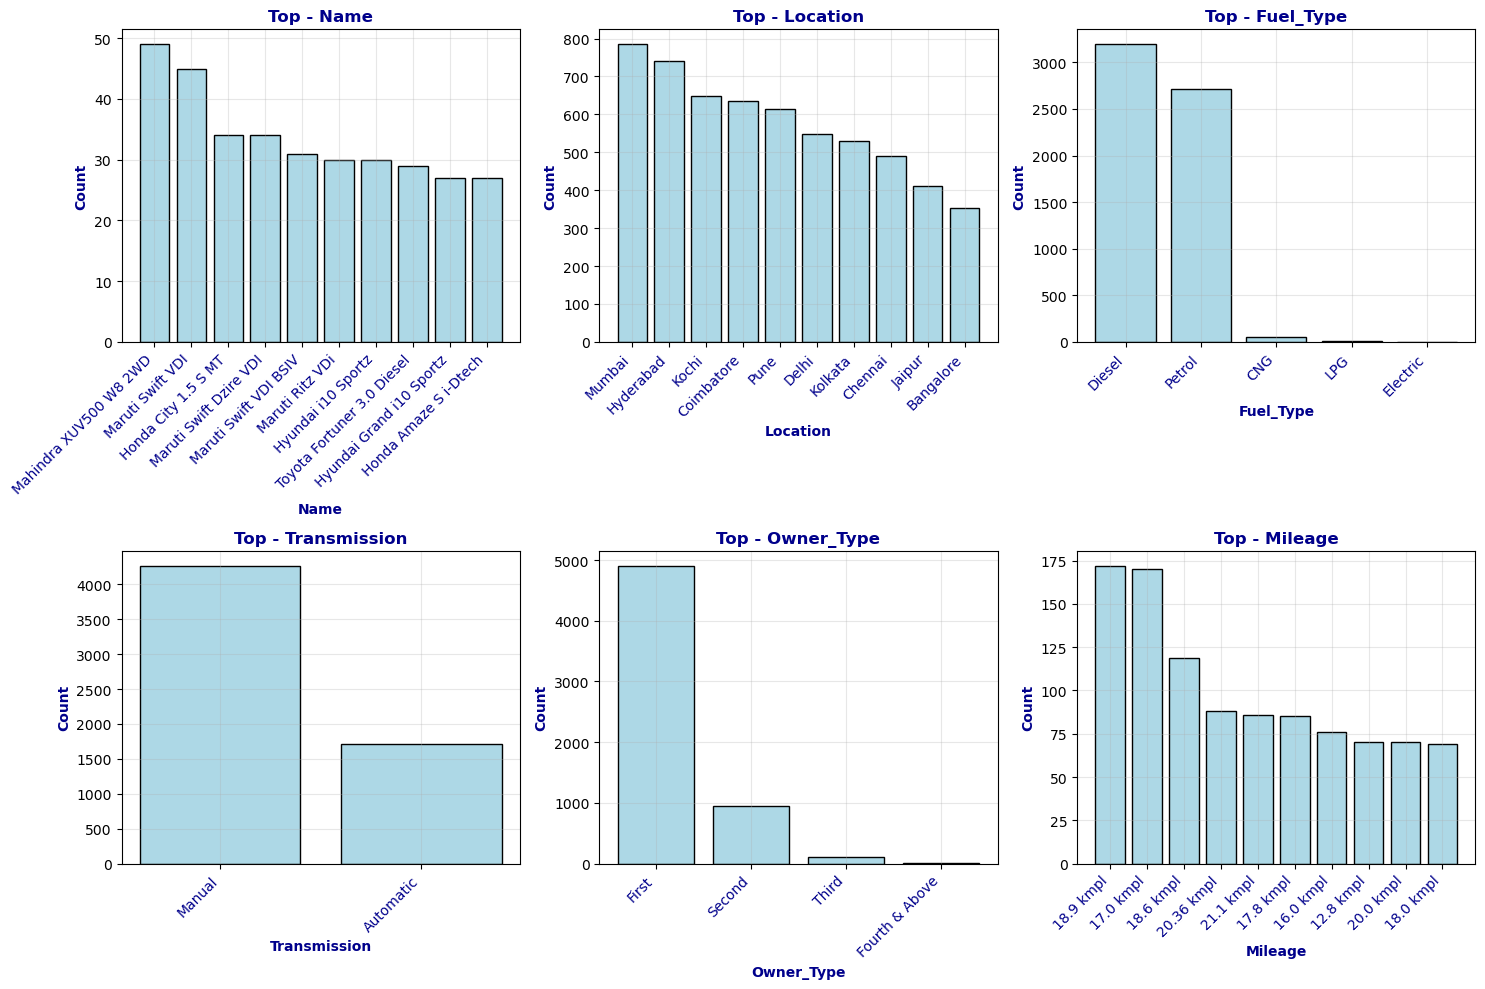

In [47]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    data = df_clean[feature].dropna()
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}', color='darkblue', fontweight='bold')
    plt.grid(True, alpha=0.3)
    if feature == 'Kilometers_Driven':
        plt.gca().xaxis.set_major_formatter(lambda x, p: f'{int(x/1000)}k')
    plt.xlabel(feature, color='darkblue', fontweight='bold')
    plt.ylabel('Frequency', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

categorical_features = df_clean.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    if i <= 6:
        plt.subplot(2, 3, i)
        value_counts = df_clean[feature].value_counts().head(10)
        plt.bar(range(len(value_counts)), value_counts.values, edgecolor='black', color='lightblue')
        plt.title(f'Top - {feature}', color='darkblue', fontweight='bold')
        plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right', color='darkblue')
        plt.grid(True, alpha=0.3)
        plt.xlabel(feature, color='darkblue', fontweight='bold')
        plt.ylabel('Count', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

### Bivariée


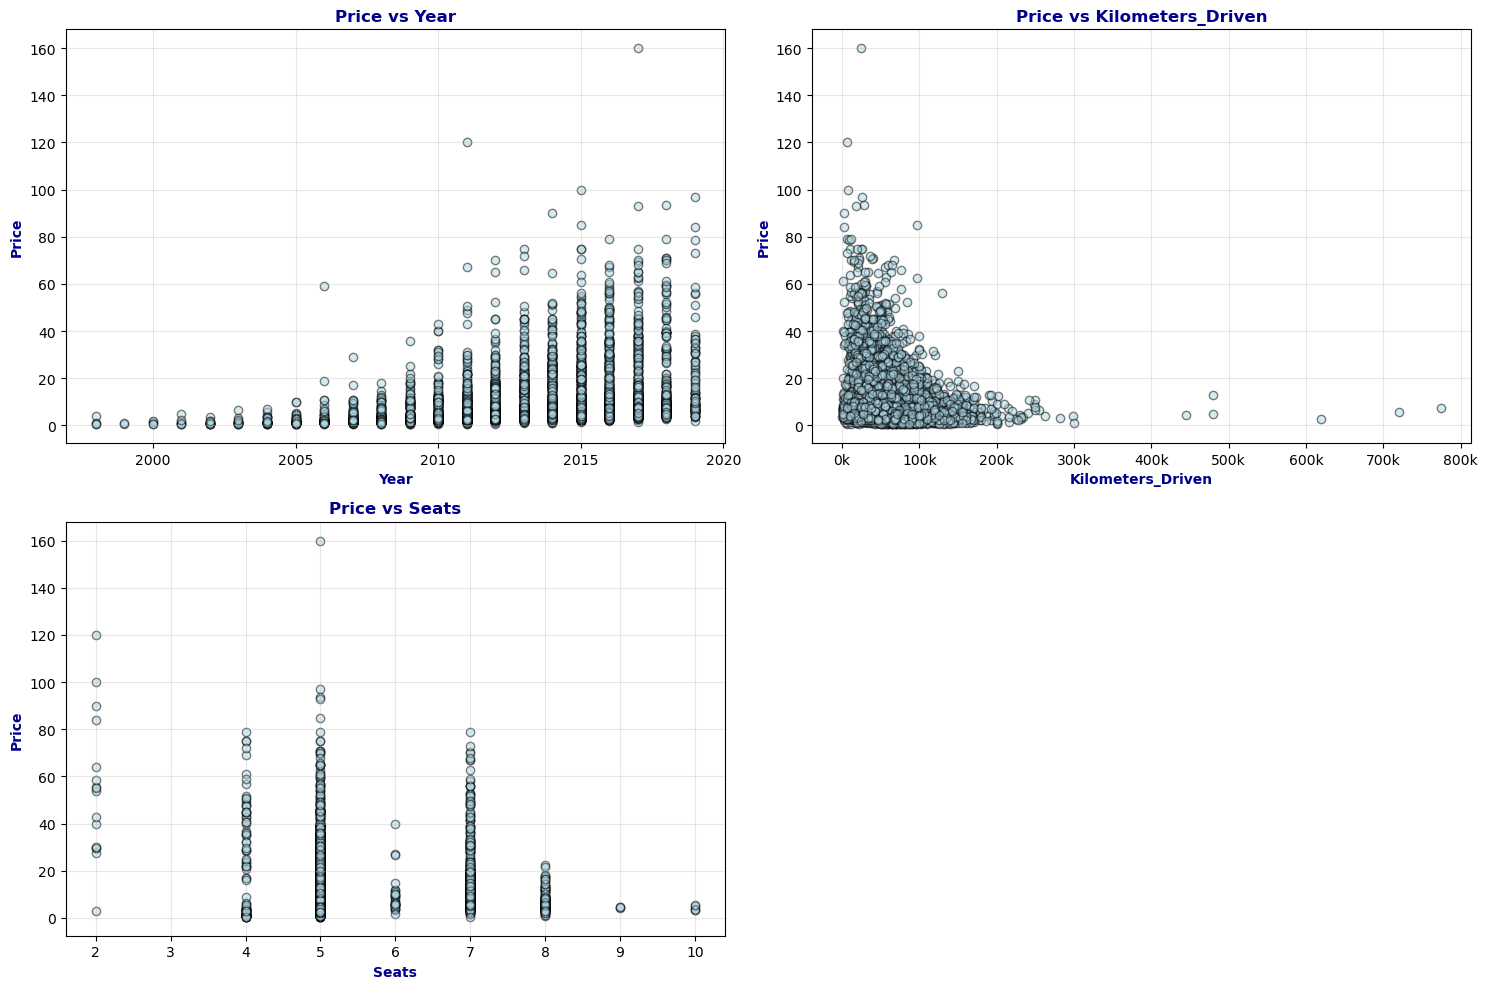

In [45]:
plt.figure(figsize=(15, 10))
numerical_features = ['Year', 'Kilometers_Driven', 'Seats']
for i, feature in enumerate(numerical_features, 1):
    if feature in df_clean.columns:
        plt.subplot(2, 2, i)
        plt.scatter(df_clean[feature], df_clean['Price'], alpha=0.5, color='lightblue', edgecolor='black')
        plt.title(f'Price vs {feature}', color='darkblue', fontweight='bold')
        plt.grid(True, alpha=0.3)
        if feature == 'Kilometers_Driven':
            plt.gca().xaxis.set_major_formatter(lambda x, p: f'{int(x/1000)}k')
        plt.xlabel(feature, color='darkblue', fontweight='bold')
        plt.ylabel('Price', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

On peux voir que les prix sont corrélés avec l'année de la voiture, le nombre de kilomètres parcourus et le nombre de sièges, avec une exeption pour les voitures 6 sièges qui ont un prix moyen très bas, ce qui s'explique sûrement pas le fait qu'il existe pas ou très peu de voitures 6 places, et donc ce sont surement des donnnées aberrantes.